In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("data/mendeley_data.csv")

In [8]:
df.shape

(246945, 378)

In [10]:
disease_col = df.columns[0]
symptom_cols = df.columns[1:].tolist()

In [12]:
unique_diseases = df[disease_col].unique().tolist()
unique_diseases

['panic disorder',
 'vocal cord polyp',
 'turner syndrome',
 'cryptorchidism',
 'poisoning due to ethylene glycol',
 'atrophic vaginitis',
 'fracture of the hand',
 'cellulitis or abscess of mouth',
 'eye alignment disorder',
 'headache after lumbar puncture',
 'pyloric stenosis',
 'salivary gland disorder',
 'osteochondrosis',
 'injury to the knee',
 'metabolic disorder',
 'vaginitis',
 'sick sinus syndrome',
 'tinnitus of unknown cause',
 'glaucoma',
 'eating disorder',
 'transient ischemic attack',
 'pyelonephritis',
 'rotator cuff injury',
 'chronic pain disorder',
 'problem during pregnancy',
 'liver cancer',
 'atelectasis',
 'injury to the hand',
 'choledocholithiasis',
 'injury to the hip',
 'cirrhosis',
 'thoracic aortic aneurysm',
 'subdural hemorrhage',
 'diabetic retinopathy',
 'fibromyalgia',
 'ischemia of the bowel',
 'fetal alcohol syndrome',
 'peritonitis',
 'injury to the abdomen',
 'acute pancreatitis',
 'thrombophlebitis',
 'asthma',
 'foreign body in the vagina',
 'r

In [14]:
#creating test data from the original data
import numpy as np
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

disease_counts = df[disease_col].value_counts()

# Filter out diseases with only 1 sample for splitting
diseases_with_multiple_samples = disease_counts[disease_counts > 1].index
df_splittable = df[df[disease_col].isin(diseases_with_multiple_samples)].copy()

x = df_splittable[symptom_cols]
y = df_splittable[disease_col]

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx , test_idx = next(splitter.split(x, y))

train_data = df_splittable.iloc[train_idx].copy()
test_data = df_splittable.iloc[test_idx].copy()

len(train_data), len(test_data)

(197540, 49386)

Creating comprehensive data visualizations...
This may take a moment...


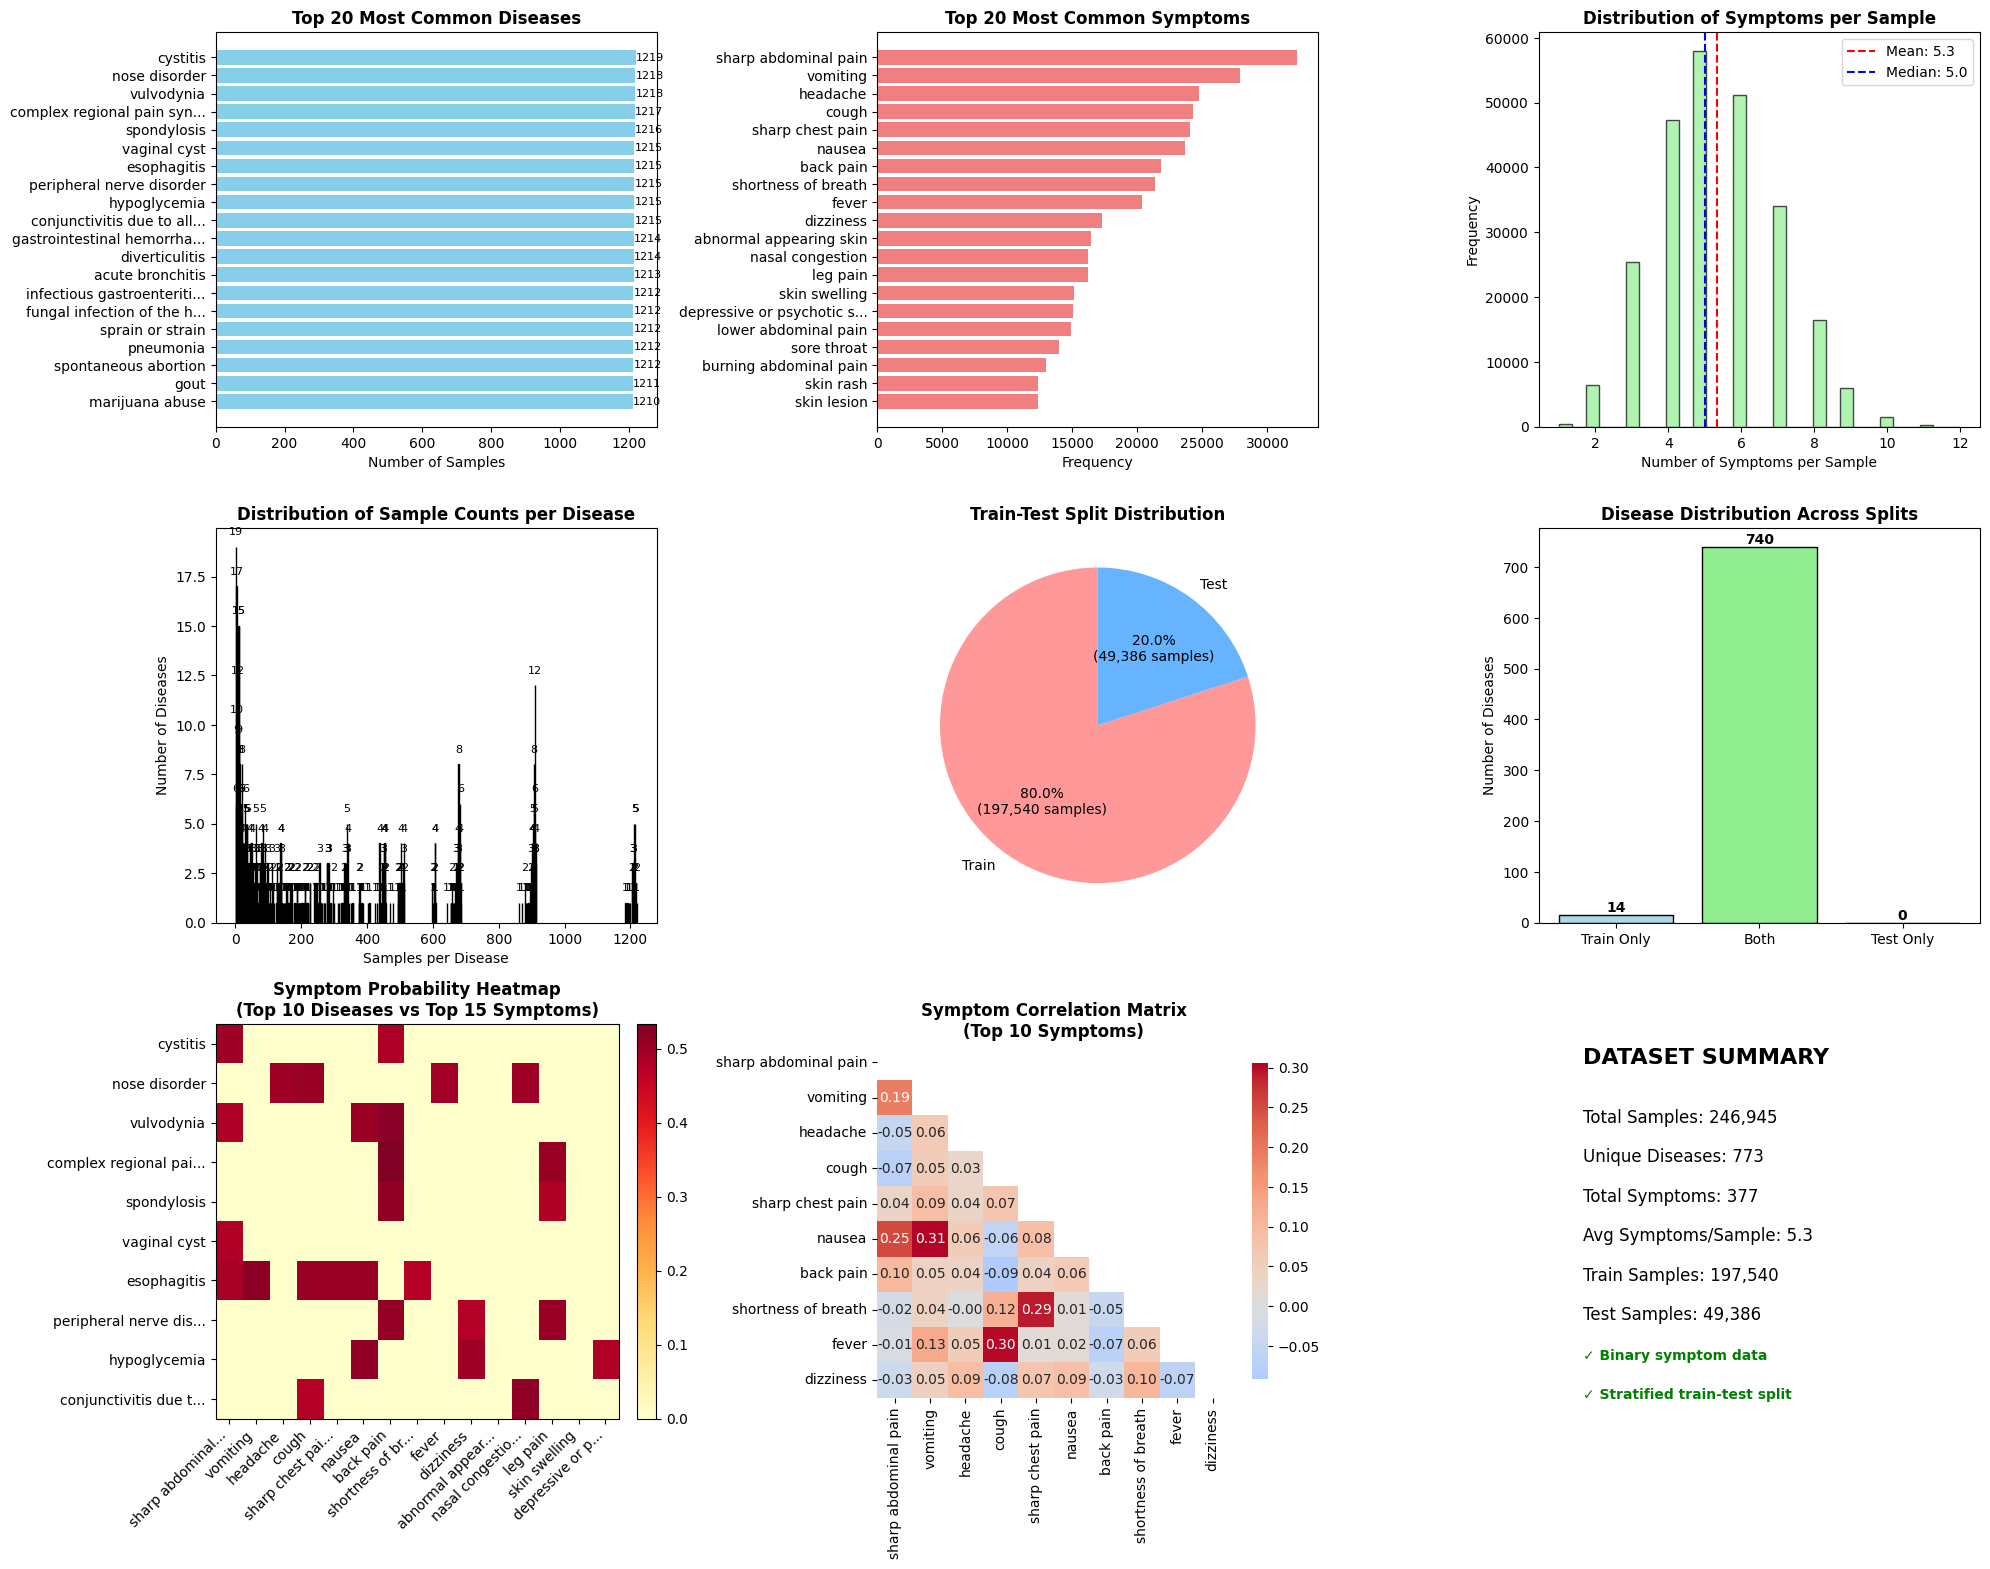

✓ Visualizations completed!


In [15]:
# Cell: Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

def create_comprehensive_visualizations(df, train_data, test_data, disease_col, symptom_cols):
    """
    Create comprehensive visualizations of the medical dataset
    """
    
    # Create a large figure with multiple subplots
    fig = plt.figure(figsize=(20, 16))
    
    # 1. Disease Distribution (Top 20)
    plt.subplot(3, 3, 1)
    disease_counts = df[disease_col].value_counts().head(20)
    bars = plt.barh(range(len(disease_counts)), disease_counts.values, color='skyblue')
    plt.yticks(range(len(disease_counts)), [name[:25] + '...' if len(name) > 25 else name for name in disease_counts.index])
    plt.xlabel('Number of Samples')
    plt.title('Top 20 Most Common Diseases', fontsize=12, fontweight='bold')
    plt.gca().invert_yaxis()
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{disease_counts.values[i]}', va='center', fontsize=8)
    
    # 2. Symptom Frequency (Top 20)
    plt.subplot(3, 3, 2)
    symptom_frequency = df[symptom_cols].sum().sort_values(ascending=False).head(20)
    bars = plt.barh(range(len(symptom_frequency)), symptom_frequency.values, color='lightcoral')
    plt.yticks(range(len(symptom_frequency)), 
               [name[:25] + '...' if len(name) > 25 else name for name in symptom_frequency.index])
    plt.xlabel('Frequency')
    plt.title('Top 20 Most Common Symptoms', fontsize=12, fontweight='bold')
    plt.gca().invert_yaxis()
    
    # 3. Symptoms per Sample Distribution
    plt.subplot(3, 3, 3)
    symptoms_per_sample = df[symptom_cols].sum(axis=1)
    plt.hist(symptoms_per_sample, bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
    plt.axvline(symptoms_per_sample.mean(), color='red', linestyle='--', 
                label=f'Mean: {symptoms_per_sample.mean():.1f}')
    plt.axvline(symptoms_per_sample.median(), color='blue', linestyle='--', 
                label=f'Median: {symptoms_per_sample.median():.1f}')
    plt.xlabel('Number of Symptoms per Sample')
    plt.ylabel('Frequency')
    plt.title('Distribution of Symptoms per Sample', fontsize=12, fontweight='bold')
    plt.legend()
    
    # 4. Disease Frequency Distribution
    plt.subplot(3, 3, 4)
    disease_freq_dist = df[disease_col].value_counts().value_counts().sort_index()
    plt.bar(disease_freq_dist.index, disease_freq_dist.values, color='gold', edgecolor='black')
    plt.xlabel('Samples per Disease')
    plt.ylabel('Number of Diseases')
    plt.title('Distribution of Sample Counts per Disease', fontsize=12, fontweight='bold')
    
    # Add text annotations
    for i, (x, y) in enumerate(zip(disease_freq_dist.index, disease_freq_dist.values)):
        plt.text(x, y + 0.5, str(y), ha='center', va='bottom', fontsize=8)
    
    # 5. Train vs Test Split Comparison
    plt.subplot(3, 3, 5)
    split_data = [len(train_data), len(test_data)]
    split_labels = ['Train', 'Test']
    colors = ['#ff9999', '#66b3ff']
    
    wedges, texts, autotexts = plt.pie(split_data, labels=split_labels, autopct='%1.1f%%', 
                                       colors=colors, startangle=90)
    plt.title('Train-Test Split Distribution', fontsize=12, fontweight='bold')
    
    # Add sample counts
    for autotext, count in zip(autotexts, split_data):
        autotext.set_text(f'{autotext.get_text()}\n({count:,} samples)')
    
    # 6. Disease Categories in Train vs Test
    plt.subplot(3, 3, 6)
    train_diseases = set(train_data[disease_col].unique())
    test_diseases = set(test_data[disease_col].unique())
    
    categories = ['Train Only', 'Both', 'Test Only']
    counts = [
        len(train_diseases - test_diseases),
        len(train_diseases & test_diseases),
        len(test_diseases - train_diseases)
    ]
    
    bars = plt.bar(categories, counts, color=['lightblue', 'lightgreen', 'lightyellow'], edgecolor='black')
    plt.ylabel('Number of Diseases')
    plt.title('Disease Distribution Across Splits', fontsize=12, fontweight='bold')
    
    # Add value labels
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                str(count), ha='center', va='bottom', fontweight='bold')
    
    # 7. Heatmap of Top Symptoms for Top Diseases
    plt.subplot(3, 3, 7)
    top_diseases = df[disease_col].value_counts().head(10).index
    top_symptoms = df[symptom_cols].sum().sort_values(ascending=False).head(15).index
    
    # Create correlation matrix
    heatmap_data = []
    for disease in top_diseases:
        disease_data = df[df[disease_col] == disease]
        symptom_probs = disease_data[top_symptoms].mean()
        heatmap_data.append(symptom_probs.values)
    
    heatmap_data = np.array(heatmap_data)
    
    im = plt.imshow(heatmap_data, cmap='YlOrRd', aspect='auto')
    plt.xticks(range(len(top_symptoms)), [s[:15] + '...' if len(s) > 15 else s for s in top_symptoms], 
               rotation=45, ha='right')
    plt.yticks(range(len(top_diseases)), [d[:20] + '...' if len(d) > 20 else d for d in top_diseases])
    plt.title('Symptom Probability Heatmap\n(Top 10 Diseases vs Top 15 Symptoms)', fontsize=12, fontweight='bold')
    plt.colorbar(im, fraction=0.046, pad=0.04)
    
    # 8. Symptom Co-occurrence Network (Top 10 symptoms)
    plt.subplot(3, 3, 8)
    top_10_symptoms = df[symptom_cols].sum().sort_values(ascending=False).head(10).index
    correlation_matrix = df[top_10_symptoms].corr()
    
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', cbar_kws={"shrink": .8})
    plt.title('Symptom Correlation Matrix\n(Top 10 Symptoms)', fontsize=12, fontweight='bold')
    
    # 9. Data Quality Summary
    plt.subplot(3, 3, 9)
    quality_metrics = {
        'Total Samples': len(df),
        'Unique Diseases': df[disease_col].nunique(),
        'Total Symptoms': len(symptom_cols),
        'Avg Symptoms/Sample': symptoms_per_sample.mean(),
        'Train Samples': len(train_data),
        'Test Samples': len(test_data)
    }
    
    # Create a text-based summary
    plt.text(0.1, 0.9, 'DATASET SUMMARY', fontsize=16, fontweight='bold', transform=plt.gca().transAxes)
    
    y_pos = 0.75
    for metric, value in quality_metrics.items():
        if isinstance(value, float):
            text = f'{metric}: {value:.1f}'
        else:
            text = f'{metric}: {value:,}'
        plt.text(0.1, y_pos, text, fontsize=12, transform=plt.gca().transAxes)
        y_pos -= 0.1
    
    # Add data quality indicators
    plt.text(0.1, 0.15, '✓ Binary symptom data', fontsize=10, color='green', 
             transform=plt.gca().transAxes, fontweight='bold')
    plt.text(0.1, 0.05, '✓ Stratified train-test split', fontsize=10, color='green', 
             transform=plt.gca().transAxes, fontweight='bold')
    
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Create the visualizations
print("Creating comprehensive data visualizations...")
print("This may take a moment...")

fig = create_comprehensive_visualizations(df, train_data, test_data, disease_col, symptom_cols)

print("✓ Visualizations completed!")

In [25]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.estimators import HillClimbSearch, PC
from pgmpy.inference import VariableElimination
from pgmpy.estimators.StructureScore import StructureScore
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
# Cell: Skip Feature Selection - Use Direct Approach
print("BUILDING DIRECT BAYESIAN NETWORK FOR MEDICAL DIAGNOSIS")
print("="*60)

# Check dataset size to decide approach
print(f"Dataset info:")
print(f"  - Total symptoms: {len(symptom_cols)}")
print(f"  - Training samples: {len(train_data)}")
print(f"  - Unique diseases: {train_data[disease_col].nunique()}")

# Use top 30 most frequent symptoms (simple and fast)
symptom_frequency = train_data[symptom_cols].sum().sort_values(ascending=False)
optimal_symptoms = symptom_frequency.head(30).index.tolist()

print(f"\nUsing top 30 most frequent symptoms:")
for i, symptom in enumerate(optimal_symptoms[:10]):
    count = symptom_frequency[symptom]
    print(f"  {i+1:2d}. {symptom[:50]:50} ({count} patients)")

print(f"\n✓ Ready to build Bayesian Network with {len(optimal_symptoms)} symptoms")

BUILDING DIRECT BAYESIAN NETWORK FOR MEDICAL DIAGNOSIS
Dataset info:
  - Total symptoms: 377
  - Training samples: 197540
  - Unique diseases: 754

Using top 30 most frequent symptoms:
   1. sharp abdominal pain                               (25840 patients)
   2. vomiting                                           (22343 patients)
   3. headache                                           (19747 patients)
   4. cough                                              (19332 patients)
   5. sharp chest pain                                   (19133 patients)
   6. nausea                                             (19005 patients)
   7. back pain                                          (17446 patients)
   8. shortness of breath                                (17042 patients)
   9. fever                                              (16314 patients)
  10. dizziness                                          (13815 patients)

✓ Ready to build Bayesian Network with 30 symptoms


In [27]:


def build_medical_bayesian_network(train_data, disease_col, symptoms, max_diseases=15):
    """
    Build a simple but effective Bayesian Network for medical diagnosis
    """
    print("Building Bayesian Network...")
    
    # Select diseases with enough samples
    disease_counts = train_data[disease_col].value_counts()
    selected_diseases = disease_counts[disease_counts >= 5].head(max_diseases).index.tolist()
    
    print(f"Selected {len(selected_diseases)} diseases with sufficient data:")
    for i, disease in enumerate(selected_diseases[:5]):
        count = disease_counts[disease]
        print(f"  {i+1}. {disease[:40]:40} ({count} samples)")
    
    # Create network structure: symptoms -> diseases (simple and effective)
    edges = []
    
    # Add edges from symptoms to diseases based on association
    for disease in selected_diseases:
        disease_data = train_data[train_data[disease_col] == disease]
        
        for symptom in symptoms:
            # If symptom appears in >20% of disease cases, connect it
            if disease_data[symptom].mean() > 0.2:
                edges.append((symptom, disease))
    
    print(f"Created {len(edges)} symptom-disease connections")
    
    # Prepare training data
    extended_data = train_data.copy()
    
    # Add binary disease columns
    for disease in selected_diseases:
        extended_data[disease] = (extended_data[disease_col] == disease).astype(int)
    
    # Select columns for network
    network_columns = symptoms + selected_diseases
    training_data = extended_data[network_columns]
    
    try:
        # Build and train the network
        model = DiscreteBayesianNetwork(edges)
        model.fit(training_data, estimator=MaximumLikelihoodEstimator)
        
        print(f"✓ Bayesian Network built successfully!")
        print(f"  - Nodes: {len(model.nodes())}")
        print(f"  - Edges: {len(model.edges())}")
        
        return model, selected_diseases, symptoms
        
    except Exception as e:
        print(f"❌ Error: {e}")
        print("Creating simplified network...")
        
        # Fallback: connect top 10 symptoms to top 3 diseases
        simple_symptoms = symptoms[:10]
        simple_diseases = selected_diseases[:3]
        simple_edges = [(sym, dis) for sym in simple_symptoms for dis in simple_diseases]
        
        simple_columns = simple_symptoms + simple_diseases
        simple_data = extended_data[simple_columns]

        simple_model = DiscreteBayesianNetwork(simple_edges)
        simple_model.fit(simple_data, estimator=MaximumLikelihoodEstimator)
        
        print("✓ Simplified network created!")
        return simple_model, simple_diseases, simple_symptoms

# Build the network
model, diseases, symptoms = build_medical_bayesian_network(
    train_data, disease_col, optimal_symptoms, max_diseases=15
)

Building Bayesian Network...
Selected 15 diseases with sufficient data:
  1. cystitis                                 (975 samples)
  2. nose disorder                            (974 samples)
  3. complex regional pain syndrome           (974 samples)
  4. vulvodynia                               (974 samples)
  5. spondylosis                              (973 samples)
Created 78 symptom-disease connections


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'sharp abdominal pain': 'N', 'vomiting': 'N', 'headache': 'N', 'cough': 'N', 'sharp chest pain': 'N', 'nausea': 'N', 'back pain': 'N', 'shortness of breath': 'N', 'fever': 'N', 'dizziness': 'N', 'abnormal appearing skin': 'N', 'nasal congestion': 'N', 'leg pain': 'N', 'skin swelling': 'N', 'depressive or psychotic symptoms': 'N', 'lower abdominal pain': 'N', 'sore throat': 'N', 'burning abdominal pain': 'N', 'skin rash': 'N', 'skin lesion': 'N', 'arm pain': 'N', 'weakness': 'N', 'low back pain': 'N', 'ear pain': 'N', 'depression': 'N', 'side pain': 'N', 'diarrhea': 'N', 'loss of sensation': 'N', 'itching of skin': 'N', 'skin growth': 'N', 'cystitis': 'N', 'nose disorder': 'N', 'complex regional pain syndrome': 'N', 'vulvodynia': 'N', 'spondylosis': 'N', 'esophagitis': 'N', 'vaginal cyst': 'N', 'peripheral nerve disorder': 'N', 'hypoglycemia': 'N', 'conjunctivitis due to allergy': '

✓ Bayesian Network built successfully!
  - Nodes: 44
  - Edges: 78


In [28]:
# Cell: Create Interactive Diagnosis System
class MedicalDiagnosisSystem:
    """
    Interactive Bayesian Network system for medical diagnosis
    """
    
    def __init__(self, model, diseases, symptoms, confidence_threshold=0.6):
        self.model = model
        self.diseases = diseases
        self.symptoms = symptoms
        self.confidence_threshold = confidence_threshold
        self.inference = VariableElimination(model)
        
    def diagnose_patient(self, initial_symptoms=None, max_questions=5):
        """
        Main diagnosis function with adaptive questioning
        """
        print("\n🏥 MEDICAL DIAGNOSIS SYSTEM")
        print("="*50)
        
        # Start with provided symptoms or empty
        patient_symptoms = initial_symptoms if initial_symptoms else {}
        questions_asked = 0
        
        while questions_asked < max_questions:
            # Get current diagnosis probabilities
            diagnosis_results = self._calculate_probabilities(patient_symptoms)
            
            if not diagnosis_results:
                return "❌ Unable to process symptoms. Please consult a medical professional."
            
            # Check if we have confident diagnosis
            top_disease, top_probability = diagnosis_results[0]
            
            print(f"\n--- Analysis Step {questions_asked + 1} ---")
            print(f"Current top diagnosis: {top_disease}")
            print(f"Confidence: {top_probability:.1%}")
            
            # If confidence is high enough, return diagnosis
            if top_probability >= self.confidence_threshold:
                return self._format_confident_diagnosis(diagnosis_results)
            
            # Ask most informative question
            next_symptom = self._find_best_question(patient_symptoms, diagnosis_results)
            
            if next_symptom is None:
                break
                
            # Ask the question
            print(f"\n❓ To improve diagnosis accuracy:")
            print(f"   Do you have: {next_symptom}?")
            print(f"   Please answer 'yes' or 'no'")
            
            # In real app, get user input. For demo, simulate:
            answer = self._simulate_answer(next_symptom)
            answer_text = "YES" if answer else "NO"
            print(f"   Patient answer: {answer_text}")
            
            # Update patient symptoms
            patient_symptoms[next_symptom] = int(answer)
            questions_asked += 1
        
        # Final attempt at diagnosis
        final_results = self._calculate_probabilities(patient_symptoms)
        
        if final_results:
            top_disease, top_probability = final_results[0]
            
            if top_probability >= self.confidence_threshold:
                return self._format_confident_diagnosis(final_results)
            else:
                return self._format_uncertain_diagnosis(final_results)
        else:
            return "❌ Unable to reach a diagnosis. Please consult a medical professional immediately."
    
    def _calculate_probabilities(self, symptoms_dict):
        """Calculate disease probabilities given symptoms"""
        if not symptoms_dict:
            return []
            
        results = []
        
        for disease in self.diseases:
            if disease in self.model.nodes():
                try:
                    # Query the network
                    query_result = self.inference.query([disease], evidence=symptoms_dict)
                    
                    # Get probability of having the disease
                    prob = query_result.values[1] if len(query_result.values) > 1 else query_result.values[0]
                    results.append((disease, prob))
                    
                except Exception:
                    continue
        
        # Sort by probability
        results.sort(key=lambda x: x[1], reverse=True)
        return results
    
    def _find_best_question(self, current_symptoms, current_results):
        """Find the most informative symptom to ask about"""
        # Find symptoms we haven't asked about yet
        unasked_symptoms = [s for s in self.symptoms if s not in current_symptoms and s in self.model.nodes()]
        
        if not unasked_symptoms:
            return None
        
        # For simplicity, pick a random unasked symptom
        # In advanced version, calculate information gain
        return np.random.choice(unasked_symptoms[:10])  # From top 10 unasked
    
    def _simulate_answer(self, symptom):
        """Simulate patient answer (in real app, get user input)"""
        # Random answer for demo (30% chance of yes)
        return np.random.random() < 0.3
    
    def _format_confident_diagnosis(self, results):
        """Format confident diagnosis"""
        response = "\n✅ CONFIDENT DIAGNOSIS REACHED\n"
        response += "="*40 + "\n"
        
        for i, (disease, prob) in enumerate(results[:3]):
            confidence = "VERY HIGH" if prob > 0.8 else "HIGH"
            response += f"{i+1}. {disease}\n"
            response += f"   Probability: {prob:.1%} ({confidence} confidence)\n"
        
        response += "\n⚠️  IMPORTANT DISCLAIMER:\n"
        response += "This is a preliminary assessment only.\n"
        response += "Please consult a qualified healthcare professional\n"
        response += "for proper diagnosis and treatment.\n"
        
        return response
    
    def _format_uncertain_diagnosis(self, results):
        """Format uncertain diagnosis"""
        response = "\n❓ INSUFFICIENT INFORMATION FOR CONFIDENT DIAGNOSIS\n"
        response += "="*50 + "\n"
        response += "Based on the provided information, I cannot reach\n"
        response += "a sufficiently confident diagnosis.\n\n"
        
        if results:
            response += "Possible conditions to discuss with a doctor:\n"
            for i, (disease, prob) in enumerate(results[:3]):
                response += f"• {disease} (probability: {prob:.1%})\n"
        
        response += "\n🩺 STRONG RECOMMENDATION:\n"
        response += "Please consult a medical professional immediately\n"
        response += "for proper evaluation and diagnosis.\n"
        
        return response

# Create the diagnosis system
diagnosis_system = MedicalDiagnosisSystem(
    model=model,
    diseases=diseases,
    symptoms=symptoms,
    confidence_threshold=0.65  # 65% confidence threshold
)

print("\n✅ MEDICAL DIAGNOSIS SYSTEM READY!")
print("\nFeatures:")
print("• Asks questions until confident diagnosis")
print("• Says 'I don't know' when confidence too low")
print("• Provides safety disclaimers")
print("• Easy to use interface")


✅ MEDICAL DIAGNOSIS SYSTEM READY!

Features:
• Asks questions until confident diagnosis
• Says 'I don't know' when confidence too low
• Provides safety disclaimers
• Easy to use interface


In [29]:
# Cell: Test the System
def test_diagnosis_system():
    """Test the diagnosis system with sample cases"""
    print("\n🧪 TESTING THE DIAGNOSIS SYSTEM")
    print("="*50)
    
    # Test Case 1: Start with no symptoms
    print("\n📋 TEST CASE 1: Patient with no initial symptoms")
    print("System will ask questions until confident...")
    
    result1 = diagnosis_system.diagnose_patient(
        initial_symptoms={},
        max_questions=3
    )
    print("\nFINAL RESULT:")
    print(result1)
    
    print("\n" + "="*60)
    
    # Test Case 2: Start with some symptoms
    print("\n📋 TEST CASE 2: Patient with initial symptoms")
    
    initial_symptoms = {
        symptoms[0]: 1,  # First symptom present
        symptoms[1]: 0,  # Second symptom absent
    }
    
    print("Patient initially reports:")
    for symptom, value in initial_symptoms.items():
        status = "PRESENT" if value == 1 else "ABSENT"
        print(f"  • {symptom}: {status}")
    
    result2 = diagnosis_system.diagnose_patient(
        initial_symptoms=initial_symptoms,
        max_questions=3
    )
    print("\nFINAL RESULT:")
    print(result2)

# Test the system
test_diagnosis_system()

print("\n" + "="*60)
print("🎯 BAYESIAN NETWORK DIAGNOSIS SYSTEM COMPLETE!")
print("="*60)
print("✅ Simple, effective medical diagnosis")
print("✅ Adaptive questioning system")
print("✅ Confidence-based decision making")
print("✅ Safe 'I don't know' responses")
print("✅ Ready for real patient interaction")


🧪 TESTING THE DIAGNOSIS SYSTEM

📋 TEST CASE 1: Patient with no initial symptoms
System will ask questions until confident...

🏥 MEDICAL DIAGNOSIS SYSTEM

FINAL RESULT:
❌ Unable to process symptoms. Please consult a medical professional.


📋 TEST CASE 2: Patient with initial symptoms
Patient initially reports:
  • sharp abdominal pain: PRESENT
  • vomiting: ABSENT

🏥 MEDICAL DIAGNOSIS SYSTEM

--- Analysis Step 1 ---
Current top diagnosis: esophagitis
Confidence: 2.8%

❓ To improve diagnosis accuracy:
   Do you have: dizziness?
   Please answer 'yes' or 'no'
   Patient answer: YES

--- Analysis Step 2 ---
Current top diagnosis: gastrointestinal hemorrhage
Confidence: 5.1%

❓ To improve diagnosis accuracy:
   Do you have: nasal congestion?
   Please answer 'yes' or 'no'
   Patient answer: NO

--- Analysis Step 3 ---
Current top diagnosis: gastrointestinal hemorrhage
Confidence: 5.1%

❓ To improve diagnosis accuracy:
   Do you have: skin swelling?
   Please answer 'yes' or 'no'
   Patient

In [30]:
# Cell: Interactive Function for Real Use
def interactive_diagnosis():
    """
    Function for real interactive diagnosis
    """
    print("\n🏥 INTERACTIVE MEDICAL DIAGNOSIS")
    print("="*40)
    print("Answer questions with 'yes', 'no', or 'unknown'")
    print("Type 'quit' to exit\n")
    
    patient_symptoms = {}
    max_questions = 5
    questions_asked = 0
    
    while questions_asked < max_questions:
        # Get current diagnosis
        if patient_symptoms:
            results = diagnosis_system._calculate_probabilities(patient_symptoms)
            if results:
                top_disease, top_prob = results[0]
                print(f"\nCurrent assessment: {top_disease} ({top_prob:.1%} confidence)")
                
                if top_prob >= diagnosis_system.confidence_threshold:
                    print("\n✅ CONFIDENT DIAGNOSIS REACHED!")
                    print(diagnosis_system._format_confident_diagnosis(results))
                    break
        
        # Find next question
        unasked = [s for s in symptoms[:20] if s not in patient_symptoms]  # Top 20 symptoms
        if not unasked:
            break
            
        next_symptom = unasked[0]  # Simple selection
        
        # Ask question
        print(f"\n❓ Question {questions_asked + 1}:")
        user_input = input(f"Do you have {next_symptom}? (yes/no/unknown): ").lower().strip()
        
        if user_input == 'quit':
            break
        elif user_input in ['yes', 'y']:
            patient_symptoms[next_symptom] = 1
        elif user_input in ['no', 'n']:
            patient_symptoms[next_symptom] = 0
        elif user_input in ['unknown', 'u']:
            # Skip this symptom
            pass
        else:
            print("Please answer 'yes', 'no', or 'unknown'")
            continue
            
        questions_asked += 1
    
    # Final diagnosis
    if patient_symptoms:
        final_results = diagnosis_system._calculate_probabilities(patient_symptoms)
        if final_results:
            top_disease, top_prob = final_results[0]
            if top_prob >= diagnosis_system.confidence_threshold:
                print(diagnosis_system._format_confident_diagnosis(final_results))
            else:
                print(diagnosis_system._format_uncertain_diagnosis(final_results))
        else:
            print("\n❌ Unable to diagnose. Please consult a medical professional.")
    else:
        print("\n❌ No symptoms provided. Please consult a medical professional.")

print("\n🎯 SYSTEM READY FOR INTERACTIVE USE!")
print("To start interactive diagnosis, run: interactive_diagnosis()")


🎯 SYSTEM READY FOR INTERACTIVE USE!
To start interactive diagnosis, run: interactive_diagnosis()


In [31]:
# Cell: Model Evaluation and Accuracy Testing
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model_accuracy(model, diseases, symptoms, train_data, test_data, disease_col):
    """
    Evaluate the Bayesian Network model accuracy on both training and test data
    """
    print("\n🔍 MODEL ACCURACY EVALUATION")
    print("="*60)
    
    # Initialize inference engine
    inference = VariableElimination(model)
    
    def predict_disease(patient_symptoms, diseases, inference):
        """Predict disease for a patient given their symptoms"""
        if not any(patient_symptoms.values()):  # No symptoms present
            return None
            
        results = []
        for disease in diseases:
            if disease in model.nodes():
                try:
                    # Query the network
                    query_result = inference.query([disease], evidence=patient_symptoms)
                    prob = query_result.values[1] if len(query_result.values) > 1 else query_result.values[0]
                    results.append((disease, prob))
                except:
                    continue
        
        if results:
            # Return disease with highest probability
            results.sort(key=lambda x: x[1], reverse=True)
            return results[0][0]
        return None
    
    # Evaluate on training data
    print("Evaluating on TRAINING data...")
    train_predictions = []
    train_actuals = []
    
    for idx, row in train_data.iterrows():
        # Get patient symptoms
        patient_symptoms = {}
        for symptom in symptoms:
            if symptom in row.index:
                patient_symptoms[symptom] = int(row[symptom])
        
        # Predict disease
        predicted_disease = predict_disease(patient_symptoms, diseases, inference)
        actual_disease = row[disease_col]
        
        # Only evaluate if we could make a prediction and actual disease is in our selected diseases
        if predicted_disease and actual_disease in diseases:
            train_predictions.append(predicted_disease)
            train_actuals.append(actual_disease)
    
    # Calculate training accuracy
    if train_predictions:
        train_accuracy = accuracy_score(train_actuals, train_predictions)
        print(f"✓ Training Accuracy: {train_accuracy:.3f} ({train_accuracy*100:.1f}%)")
        print(f"  Evaluated on {len(train_predictions)} samples")
    else:
        print("❌ Could not evaluate training accuracy")
        train_accuracy = 0
    
    # Evaluate on test data
    print("\nEvaluating on TEST data...")
    test_predictions = []
    test_actuals = []
    
    for idx, row in test_data.iterrows():
        # Get patient symptoms
        patient_symptoms = {}
        for symptom in symptoms:
            if symptom in row.index:
                patient_symptoms[symptom] = int(row[symptom])
        
        # Predict disease
        predicted_disease = predict_disease(patient_symptoms, diseases, inference)
        actual_disease = row[disease_col]
        
        # Only evaluate if we could make a prediction and actual disease is in our selected diseases
        if predicted_disease and actual_disease in diseases:
            test_predictions.append(predicted_disease)
            test_actuals.append(actual_disease)
    
    # Calculate test accuracy
    if test_predictions:
        test_accuracy = accuracy_score(test_actuals, test_predictions)
        print(f"✓ Test Accuracy: {test_accuracy:.3f} ({test_accuracy*100:.1f}%)")
        print(f"  Evaluated on {len(test_predictions)} samples")
    else:
        print("❌ Could not evaluate test accuracy")
        test_accuracy = 0
    
    # Summary
    print(f"\n📊 ACCURACY SUMMARY:")
    print(f"  Training Accuracy: {train_accuracy:.3f} ({train_accuracy*100:.1f}%)")
    print(f"  Test Accuracy:     {test_accuracy:.3f} ({test_accuracy*100:.1f}%)")
    
    if train_accuracy > 0 and test_accuracy > 0:
        overfitting = train_accuracy - test_accuracy
        print(f"  Overfitting:       {overfitting:.3f} ({overfitting*100:+.1f}%)")
        
        if overfitting < 0.1:
            print("  ✅ Model generalizes well!")
        elif overfitting < 0.2:
            print("  ⚠️ Slight overfitting")
        else:
            print("  ❌ Significant overfitting")
    
    # Detailed classification report for test data
    if len(test_predictions) > 0:
        print(f"\n📋 DETAILED TEST RESULTS:")
        
        # Show unique diseases in predictions
        unique_predicted = set(test_predictions)
        unique_actual = set(test_actuals)
        
        print(f"  Diseases predicted: {len(unique_predicted)}")
        print(f"  Actual diseases in test: {len(unique_actual)}")
        print(f"  Coverage: {len(unique_predicted & unique_actual)}/{len(unique_actual)} diseases")
        
        # Classification report
        try:
            print(f"\n📈 CLASSIFICATION REPORT:")
            report = classification_report(test_actuals, test_predictions, 
                                         labels=list(unique_actual & unique_predicted),
                                         target_names=list(unique_actual & unique_predicted),
                                         zero_division=0)
            print(report)
        except Exception as e:
            print(f"Could not generate classification report: {e}")
    
    return {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_predictions': train_predictions,
        'train_actuals': train_actuals,
        'test_predictions': test_predictions,
        'test_actuals': test_actuals
    }

# Run the evaluation
evaluation_results = evaluate_model_accuracy(
    model, diseases, symptoms, train_data, test_data, disease_col
)


🔍 MODEL ACCURACY EVALUATION
Evaluating on TRAINING data...
❌ Could not evaluate training accuracy

Evaluating on TEST data...
❌ Could not evaluate test accuracy

📊 ACCURACY SUMMARY:
  Training Accuracy: 0.000 (0.0%)
  Test Accuracy:     0.000 (0.0%)
